In [1]:
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from jupyutils import *

In [2]:
df = pd.read_csv('commodities.csv')

In [3]:
df

,date,instrument,maturity,observation,value,currency
0,2021-01-04T00:00:00.000Z,CBOT.ZS,F2021,High,1349.75,USD
1,2021-01-04T00:00:00.000Z,CBOT.ZS,F2021,Low,1306.25,USD
2,2021-01-04T00:00:00.000Z,CBOT.ZS,F2021,Settle,1316.50,USD
3,2021-01-04T00:00:00.000Z,CBOT.ZS,H2021,High,1349.50,USD
4,2021-01-04T00:00:00.000Z,CBOT.ZS,H2021,Low,1301.00,USD
...,...,...,...,...,...,...
19014,2021-12-01T00:00:00.000Z,CBOT.ZC,Z2023,High,507.75,USD
19015,2021-12-01T00:00:00.000Z,CBOT.ZC,Z2023,Low,505.75,USD
19016,2021-12-01T00:00:00.000Z,CBOT.ZC,Z2023,Settle,507.50,USD
19017,2021-12-01T00:00:00.000Z,CBOT.ZC,N2024,Settle,515.75,USD


* We reformat the dates to days from earliest day

In [4]:
df = add_days_col(df)

* How many uniques per column?

In [5]:
display_lst_as_table([
    [c, len(df[c].unique())]
    for c in df.columns
])

date,231
instrument,2
maturity,34
observation,3
value,2978
currency,1
days,231


* The currency is always USD
* There are only 2 instruments, what are they?

In [6]:
print(df['instrument'].unique())

['CBOT.ZS' 'CBOT.ZC']


* There are 2 instruments 'CBOT.ZS' and 'CBOT.ZC'. Googleing it it seems this is a standard for Soya and Corn
* We histogram the data into these 2 sets...

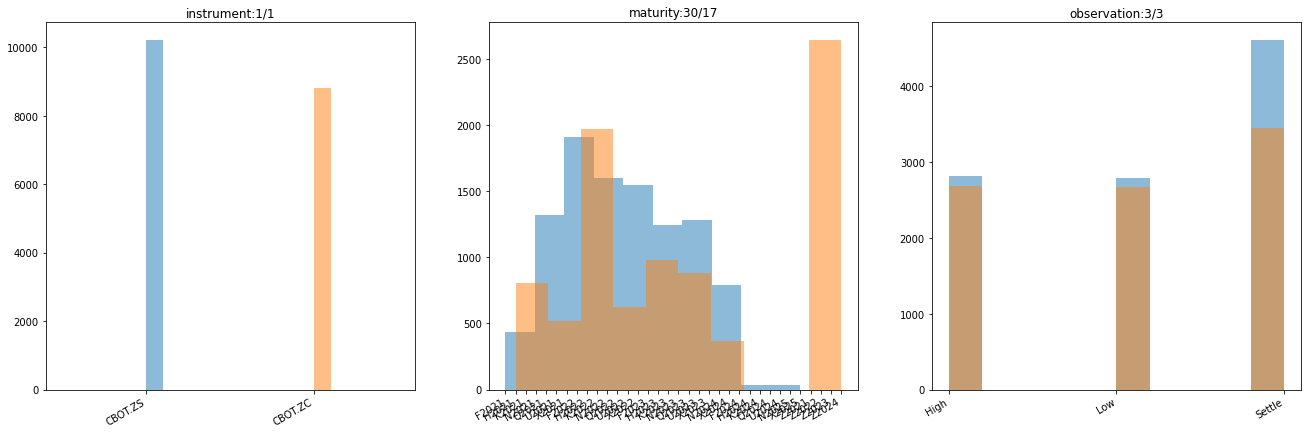

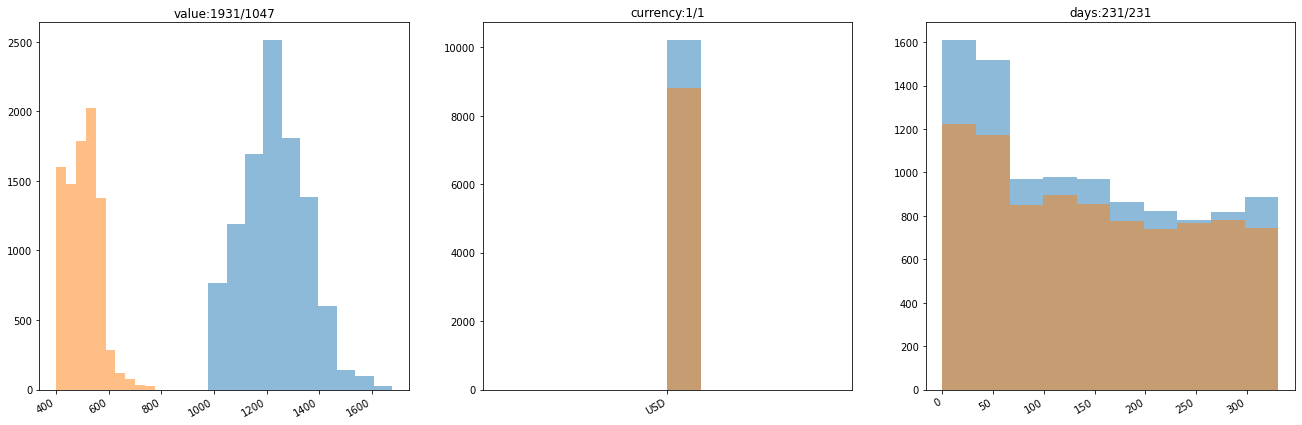

In [7]:
df1 = df[df['instrument']=='CBOT.ZS']
df2 = df[df['instrument']=='CBOT.ZC']
hist([df1,df2])

* Both classes are similar in amount (balanced dataset)
* Corn is around half price of soya in average
* Let's visualize timeseries...

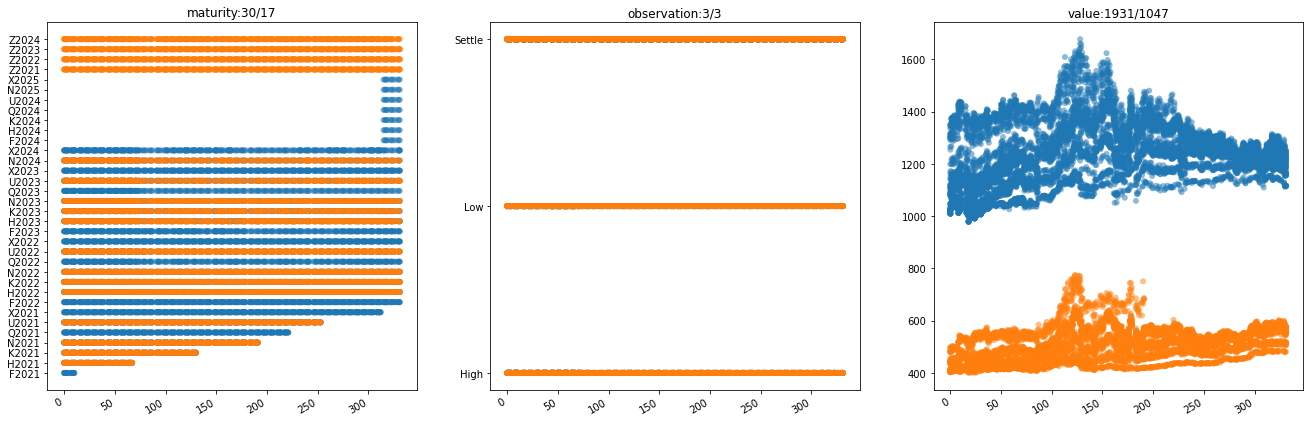

In [8]:
generic_display(
    [df1,df2],
    'scatter',
    skip_cols = ['days', 'date', 'instrument', 'currency']
)

* Googleing some stuff I realize that the maturity is the expiry date of the future contracts. There are codes for months (a letter).
* Settle, Low and High are just the closing, highest and lowest prices within a block of time (typical candle plots int trading)


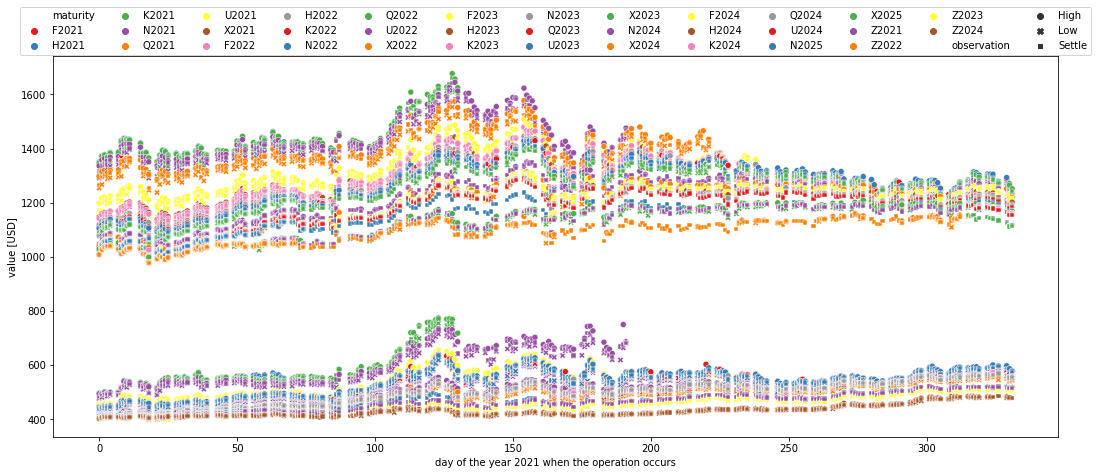

In [9]:
fig, ax = plt.subplots(1, 1,figsize=(18,7))

handler = sns.scatterplot(
    data=df, x="days", y="value", hue="maturity", style="observation", legend='full',
    palette = sns.color_palette("Set1", 34) # It is important that the colors are random here
)

ax.set_ylabel('value [USD]')
ax.set_xlabel('day of the year 2021 when the operation occurs')

plt.legend(ncol=13, bbox_to_anchor=(0.5, 0.99), loc="lower center")

handler.figure.savefig(f"imgs/2021_all_contracts.png")

* It will make more sense to plot the value depending on:
    - the maturity time of the year
    - the year of the maturity

In [10]:
df['maturity_month'] = [CODE2MONTH[m[0]] for m in df['maturity']]
df['maturity_year'] = [int(m[1:]) for m in df['maturity']]

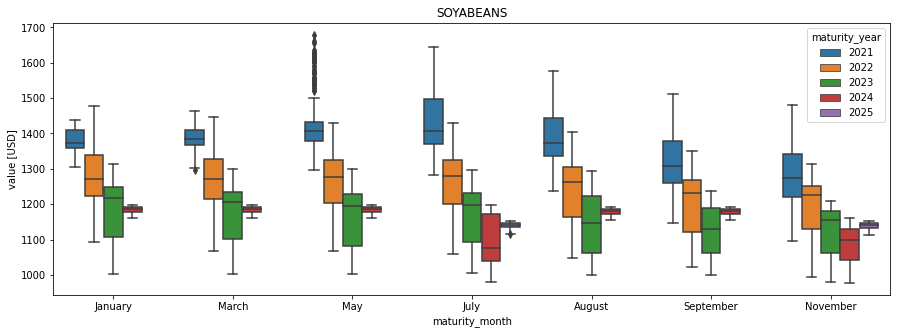

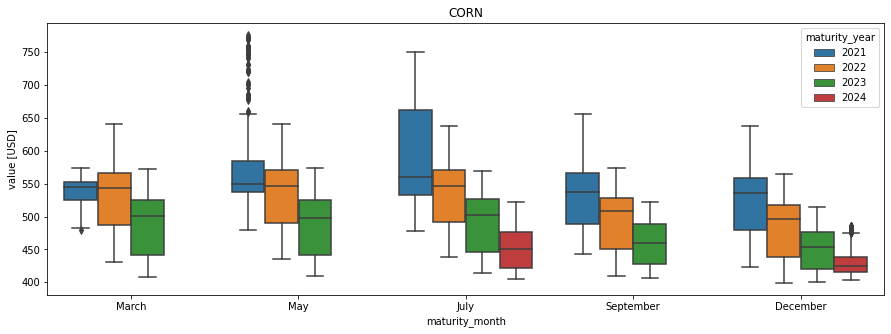

In [11]:
for kind in ['CBOT.ZS', 'CBOT.ZC']:
    
    name = ('SOYABEANS' if kind=='CBOT.ZS' else 'CORN')
    
    fig, ax = plt.subplots(1, 1,figsize=(15,5))
    
    ax.set_title(name)
    
    handler = sns.boxplot(
        data=df[df['instrument']==kind], 
        x="maturity_month", y="value", hue="maturity_year", ax=ax
    )
    
    ax.set_ylabel('value [USD]')
    
    handler.figure.savefig(f"imgs/{name}.png")

* This data starts to make sense. The trend in maturity year is clear
* Let's revert maturity year and month in the representation (now color and X axis):

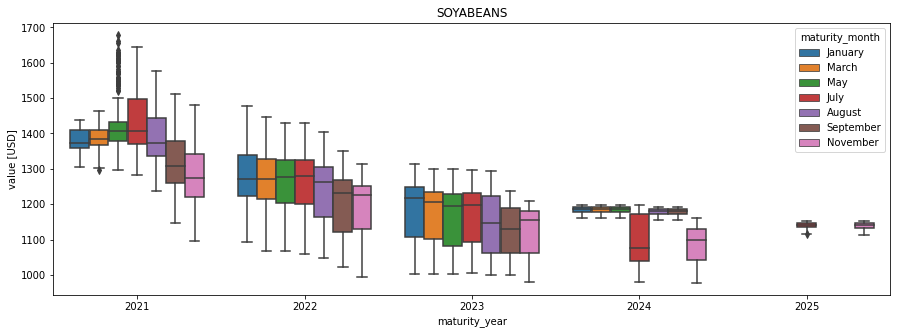

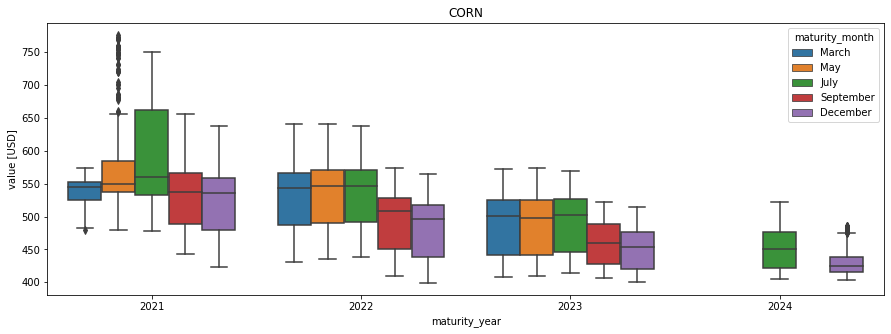

In [13]:
for kind in ['CBOT.ZS', 'CBOT.ZC']:
    
    name = ('SOYABEANS' if kind=='CBOT.ZS' else 'CORN')
    
    fig, ax = plt.subplots(1, 1,figsize=(15,5))
    
    ax.set_title(name)
    
    handler = sns.boxplot(
        data=df[df['instrument']==kind], 
        x="maturity_year", y="value", hue="maturity_month", ax=ax
    )
    
    ax.set_ylabel('value [USD]')

* The trend in maturity months has similarities along different years 